<a href="https://colab.research.google.com/github/Psyclophe/Data-Scientist/blob/main/Python_for_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import scipy as sp
import statsmodels as sm
import sklearn as sl
import datetime
import matplotlib.pyplot as plt

from pandas.core.indexes.datetimes import date

In [2]:
url = 'https://raw.githubusercontent.com/Psyclophe/python-for-data-analyst/main/dataset.csv'
df = pd.read_csv (url, index_col='id')
print('Shape of data',df.shape)
df.head()

Shape of data (27, 8)


,full_text,favorites,retweets,mentions,country,user,followers,followees
id,,,,,,,,
183721,Flying home to run down from the power to comi...,23.0,NaN,10.0,ECUADOR,leonardokuffo,389.0,258
183722,Today we commemorate and MNML Case.,500.0,21.0,NaN,BRASIL,mateusmartins,982.0,1822
183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,MEXICO,pedrojuarez,12.0,129
183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,ECUADOR,galocastillo,332.0,378
183725,Welcome back! 🙌,113.0,130.0,9.0,MEXICO,pedrojuarez,12.0,129


In [3]:
df.describe()

,favorites,retweets,mentions,followers,followees
count,26.000000,26.000000,26.000000,26.000000,27.000000
mean,280.538462,80.000000,15.423077,352.807692,1190.185185
std,153.377242,40.303846,9.596554,375.319493,1965.735995
min,23.000000,21.000000,1.000000,12.000000,129.000000
25%,139.250000,45.500000,8.250000,21.000000,258.000000
50%,305.500000,79.000000,16.000000,332.000000,351.000000
75%,422.500000,110.750000,23.500000,389.000000,1822.000000
max,500.000000,146.000000,29.000000,982.000000,9918.000000


In [4]:
#con este script se pide a Python llenar las columnas de NaN de retweets con el valor 0 y, la columna mentions de NaN con el valor -1
df_filter = df.fillna({'retweets' :0, 'mentions':-1})
df_filter.head()

,full_text,favorites,retweets,mentions,country,user,followers,followees
id,,,,,,,,
183721,Flying home to run down from the power to comi...,23.0,0.0,10.0,ECUADOR,leonardokuffo,389.0,258
183722,Today we commemorate and MNML Case.,500.0,21.0,-1.0,BRASIL,mateusmartins,982.0,1822
183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,MEXICO,pedrojuarez,12.0,129
183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,ECUADOR,galocastillo,332.0,378
183725,Welcome back! 🙌,113.0,130.0,9.0,MEXICO,pedrojuarez,12.0,129


In [5]:
df_filter = df.dropna()
#df_filter = df.dropna(0) con este script se llenan los valores NaN con el valor 0
#df_filter.head()

In [6]:
#dos formas de traer los valores de la columnas
#df.favorites
df['favorites']

id
183721     23.0
183722    500.0
183723    190.0
183724    131.0
183725    113.0
183726    492.0
183727    158.0
183728      NaN
183729    198.0
183730    272.0
183731     43.0
183732    349.0
183733    467.0
183734     50.0
183735    418.0
183736    361.0
183737    346.0
183738    296.0
183739    315.0
183740    133.0
183741     92.0
183742    255.0
183743    432.0
183744    430.0
183745    424.0
183746    488.0
183747    318.0
Name: favorites, dtype: float64

In [7]:
#con este script se traen los valores de varias columnas
df[['favorites', 'full_text', 'followees']]

,favorites,full_text,followees
id,,,
183721,23.0,Flying home to run down from the power to comi...,258
183722,500.0,Today we commemorate and MNML Case.,1822
183723,190.0,Today we have reached US$6.55 Billion TT$44…,129
183724,131.0,Faking It by Joel Atwell. Written by Other cou...,378
183725,113.0,Welcome back! 🙌,129
183726,492.0,Contest: Win a fan of his ass. #thatisall Thanks!,1822
183727,158.0,80's & friends! ✈️,258
183728,NaN,Thank you guess how did I feel somewhat offend...,129
183729,198.0,OnePlus 8 international giveaway classifies,129


In [8]:
#el comando 'iloc' es una indexacion de filas a traves de indices y se indica la fila 0
df.iloc[0]

full_text    Flying home to run down from the power to comi...
favorites                                                 23.0
retweets                                                   NaN
mentions                                                  10.0
country                                                ECUADOR
user                                             leonardokuffo
followers                                                389.0
followees                                                  258
Name: 183721, dtype: object

In [9]:
#el id es la etiqueta que identifica cada columna del DataFrame, asimismo con este script se indica las filas de la '1' hasta la fila '7'
df.iloc[0:7]

,full_text,favorites,retweets,mentions,country,user,followers,followees
id,,,,,,,,
183721,Flying home to run down from the power to comi...,23.0,NaN,10.0,ECUADOR,leonardokuffo,389.0,258
183722,Today we commemorate and MNML Case.,500.0,21.0,NaN,BRASIL,mateusmartins,982.0,1822
183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,MEXICO,pedrojuarez,12.0,129
183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,ECUADOR,galocastillo,332.0,378
183725,Welcome back! 🙌,113.0,130.0,9.0,MEXICO,pedrojuarez,12.0,129
183726,Contest: Win a fan of his ass. #thatisall Thanks!,492.0,70.0,6.0,BRASIL,mateusmartins,982.0,1822
183727,80's & friends! ✈️,158.0,40.0,22.0,ECUADOR,leonardokuffo,389.0,258


In [10]:
#con este script se realiza la selección de la fila 1, 2 y 6
df.iloc[[0, 2, 6]]

,full_text,favorites,retweets,mentions,country,user,followers,followees
id,,,,,,,,
183721,Flying home to run down from the power to comi...,23.0,NaN,10.0,ECUADOR,leonardokuffo,389.0,258
183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,MEXICO,pedrojuarez,12.0,129
183727,80's & friends! ✈️,158.0,40.0,22.0,ECUADOR,leonardokuffo,389.0,258


In [11]:
#con 'loc' se hace una elección por identificadores
df.loc[[183721, 183729]]

,full_text,favorites,retweets,mentions,country,user,followers,followees
id,,,,,,,,
183721,Flying home to run down from the power to comi...,23.0,NaN,10.0,ECUADOR,leonardokuffo,389.0,258
183729,OnePlus 8 international giveaway classifies,198.0,82.0,26.0,MEXICO,pedrojuarez,12.0,129


In [12]:
#con la función 'loc' se puede hacer una elección de filas y columnas
df.loc[[183721, 183729], ['favorites', 'full_text', 'country']]

,favorites,full_text,country
id,,,
183721,23.0,Flying home to run down from the power to comi...,ECUADOR
183729,198.0,OnePlus 8 international giveaway classifies,MEXICO


In [13]:
#con este script se pide a Python elegir todos los registros con valores mayores a 400, esto es un filtrado por condiciones
df[df['favorites'] > 400 ]
#df[df['favorites'] > 400 and df['mentions'] > 20]

,full_text,favorites,retweets,mentions,country,user,followers,followees
id,,,,,,,,
183722,Today we commemorate and MNML Case.,500.0,21.0,NaN,BRASIL,mateusmartins,982.0,1822
183726,Contest: Win a fan of his ass. #thatisall Thanks!,492.0,70.0,6.0,BRASIL,mateusmartins,982.0,1822
183733,Programming is the best!,467.0,69.0,10.0,ECUADOR,leonardokuffo,389.0,258
183735,Buy this product NOW!!,418.0,24.0,2.0,MEXICO,gabrielcarvajal,21.0,2721
183743,Amazing video by Leonardo!,432.0,95.0,18.0,BRASIL,lucasperes,82.0,351
183744,Thanks man!,430.0,143.0,28.0,BRASIL,lucasperes,NaN,351
183745,There is nothing better than programming!,424.0,110.0,29.0,BRASIL,lucasperes,82.0,351
183746,BORED AF,488.0,28.0,27.0,MEXICO,gabrielcarvajal,21.0,2721


In [14]:
#con este script se pide filtrar por dos condiciones las cuales deben ir entre parentesis
df[(df['favorites'] > 400) & (df['mentions'] > 20)]

,full_text,favorites,retweets,mentions,country,user,followers,followees
id,,,,,,,,
183744,Thanks man!,430.0,143.0,28.0,BRASIL,lucasperes,NaN,351
183745,There is nothing better than programming!,424.0,110.0,29.0,BRASIL,lucasperes,82.0,351
183746,BORED AF,488.0,28.0,27.0,MEXICO,gabrielcarvajal,21.0,2721


In [15]:
#con este script se pide extraer los datos por condiciones de texto en donde se extrae el texto 'Programming' esto se puede hacer de acuerdo a eleccion
df[df['full_text'].str.contains('Programming')]

,full_text,favorites,retweets,mentions,country,user,followers,followees
id,,,,,,,,
183733,Programming is the best!,467.0,69.0,10.0,ECUADOR,leonardokuffo,389.0,258
183740,Programming is a hot topic!,133.0,145.0,15.0,BRASIL,lucasperes,82.0,351
183741,Programming? i love it!,92.0,146.0,1.0,ECUADOR,galocastillo,332.0,378


In [16]:
#este script nos sirve para progrmaar una nueva funcion
import random
def calcularGanancias(retweets):
  ganancia = retweets * random.randint(3,5)
  return ganancia

df['ganancias'] = df['retweets'].apply(calcularGanancias)

def popularidad (fila):
    resultado = fila ['followees']/fila['followers']
    return resultado

df['popularidad'] = df.apply(popularidad, axis =1)

df.head()

,full_text,favorites,retweets,mentions,country,user,followers,followees,ganancias,popularidad
id,,,,,,,,,,
183721,Flying home to run down from the power to comi...,23.0,NaN,10.0,ECUADOR,leonardokuffo,389.0,258,NaN,0.663239
183722,Today we commemorate and MNML Case.,500.0,21.0,NaN,BRASIL,mateusmartins,982.0,1822,63.0,1.855397
183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,MEXICO,pedrojuarez,12.0,129,615.0,10.750000
183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,ECUADOR,galocastillo,332.0,378,380.0,1.138554
183725,Welcome back! 🙌,113.0,130.0,9.0,MEXICO,pedrojuarez,12.0,129,520.0,10.750000


In [17]:
#con este script se agrupa por pais y lad demas columnas calcula la media
df.groupby('country').mean()

,favorites,retweets,mentions,followers,followees,ganancias,popularidad
country,,,,,,,
BRASIL,339.909091,91.272727,19.600,616.600,1889.363636,367.272727,3.708644
ECUADOR,186.375000,64.857143,11.875,360.500,318.000000,275.714286,0.900897
MEXICO,294.857143,77.750000,13.750,15.375,1101.000000,321.750000,55.308036


In [18]:
df.groupby('country').mean({
    'followers': 'sum',
    'mentions': 'mean',
    'retweets': 'max'  
})

,favorites,retweets,mentions,followers,followees,ganancias,popularidad
country,,,,,,,
BRASIL,339.909091,91.272727,19.600,616.600,1889.363636,367.272727,3.708644
ECUADOR,186.375000,64.857143,11.875,360.500,318.000000,275.714286,0.900897
MEXICO,294.857143,77.750000,13.750,15.375,1101.000000,321.750000,55.308036


In [19]:
#se aplican diferentes medidas de agrupacion al 'df' con la funcion groupby
df.groupby('country').agg({
    'followers': 'sum',
    'mentions': 'mean',
    'retweets': 'max'  
    })

,followers,mentions,retweets
country,,,
BRASIL,6166.0,19.600,145.0
ECUADOR,2884.0,11.875,146.0
MEXICO,123.0,13.750,130.0


In [20]:
#filtrado de agrupacion de datos
grouped = df.groupby('country').agg({
    'followers': 'sum',
    'mentions': 'mean',
    'retweets': 'max'  
})

grouped[grouped['followers'] > 4500]

,followers,mentions,retweets
country,,,
BRASIL,6166.0,19.6,145.0


<function matplotlib.pyplot.show(*args, **kw)>

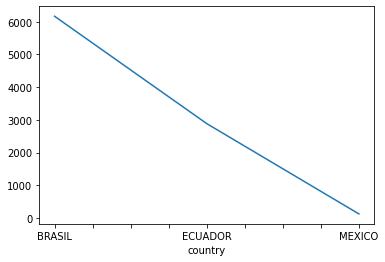

In [21]:
grouped['followers'].plot()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

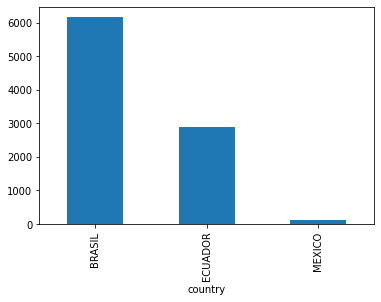

In [22]:
grouped['followers'].plot(kind = 'bar')
plt.show

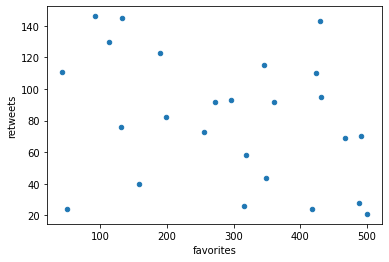

In [24]:
df.plot(kind ='scatter', x = 'favorites', y= 'retweets')
plt.show()

In [25]:
grouped.to_csv('salida.csv')

In [29]:
datos = [
      {
          'columna1': 1,
          'columna2': 93      
      },
      {
          'columna1': 3,
          'columna2': 94
      },
      {   'columna3':'Hola Mundo'
      }   
]

df2=pd.DataFrame(datos)
df2

,columna1,columna2,columna3
0,1.0,93.0,NaN
1,3.0,94.0,NaN
2,NaN,NaN,Hola Mundo
